In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Let's pull the candidates info 

senate_cand = pd.read_csv("senate.csv")
senate_cand.head()

,Cand_Id,Cand_Incumbent_Challenger_Open_Seat,Cand_Name,Cand_Office,Cand_Office_St,Cand_Party_Affiliation,Cand_State,GE WINNER INDICATOR,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,Total_Disbursement,Total_Receipt,year
0,S6AK00078,CHALLENGER,"CUDDY, DAVID W",S,AK,REP,AK,0,31261.0,260.0,0.0,862663.0,862661.0,2008
1,S8AK00074,CHALLENGER,"CALDERO, ROCKY CHRISTOPHER",S,AK,DEM,AK,0,31622.0,0.0,0.0,25891.0,32004.0,2008
2,S8AK00082,CHALLENGER,"METCALFE, RAY",S,AK,DEM,AK,0,30267.0,0.0,0.0,30562.0,30309.0,2008
3,S8AK00108,CHALLENGER,"SIKMA, RODERIC H 'RICK'",S,AK,REP,AK,0,4746.0,0.0,0.0,12203.0,11996.0,2008
4,S8AK00124,CHALLENGER,"VICKERS, RAYMOND B VIC",S,AK,REP,AK,0,10215.0,0.0,0.0,1010617.0,1055221.0,2008


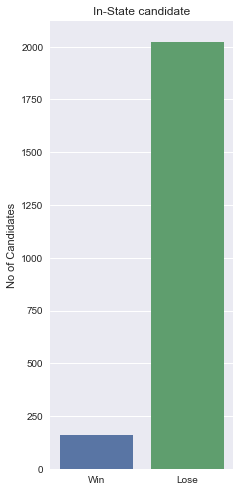

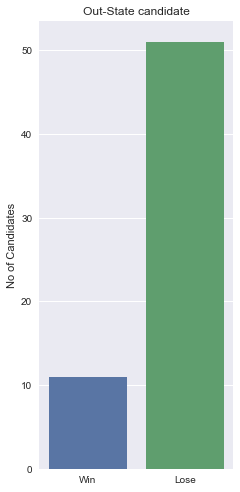

In [9]:
sns.set()
in_state_winners = senate_cand[(senate_cand["GE WINNER INDICATOR"] == 1) & (senate_cand["Cand_State"] == senate_cand["Cand_Office_St"])].count()[0]
in_state_losers = senate_cand[(senate_cand["GE WINNER INDICATOR"] == 0) & (senate_cand["Cand_State"] == senate_cand["Cand_Office_St"])].count()[0]

out_state_winners = senate_cand[(senate_cand["GE WINNER INDICATOR"] == 1) & (senate_cand["Cand_State"] != senate_cand["Cand_Office_St"])].count()[0]
out_state_losers = senate_cand[(senate_cand["GE WINNER INDICATOR"] == 0) & (senate_cand["Cand_State"] != senate_cand["Cand_Office_St"])].count()[0]

in_state_plot = pd.DataFrame({"result":['Win','Lose'],"No of Candidates":[in_state_winners,in_state_losers]})
out_state_plot = pd.DataFrame({"result":['Win','Lose'],"No of Candidates":[out_state_winners,out_state_losers]})
g = sns.factorplot(x='result', y='No of Candidates',data=in_state_plot, kind='bar',size=7, aspect=0.5)
f = sns.factorplot(x='result', y='No of Candidates',data=out_state_plot, kind='bar',size=7, aspect=0.5)

for ax in g.axes.flatten():
    ax.set_xlabel('')
    ax.set_title('In-State candidate')
for ax in f.axes.flatten():
    ax.set_xlabel('')
    ax.set_title('Out-State candidate')
    
g.savefig("in-state.jpg",dpi=1000)
f.savefig("out-state.jpg",dpi=1000)

In [11]:
print("In-State Winning percentage: ",in_state_winners * 100 / senate_cand.count()[0], "%")
print("Out-State Winning percentage: ",out_state_winners * 100 / senate_cand.count()[0], "%")

In-State Winning percentage:  7.047279214986619 %
Out-State Winning percentage:  0.49063336306868865 %
